<h1 style="color:rgb(0,120,170)">Hands-on AI I</h1>
<h2 style="color:rgb(0,120,170)">Unit 3 (Assignment) -- Logistic Regression as door opener to Deep Learning</h2>

# Exercise 0
Before tackling all those exciting tasks of this notebook, the neccessary Python modules need to be loaded. Have a look at the notebook discussed during the lecture, and import the following modules/symbols:

- <code>u3_utils</code>
- <code>numpy</code>
- <code>matplotlib.pyplot</code>
- <code>pandas</code>
- <code>seaborn</code>
- <code>torch</code>

In [168]:
import u3_utils as u3
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
import warnings
warnings.filterwarnings(r'ignore')

Afterwards, check if the <code>torch</code> module was correctly imported, by computing the <i>median</i> of <code>[7, 2, 3]</code> and printing the result.

In [169]:
torch.median(torch.as_tensor([7, 2, 3], dtype=torch.float32))

tensor(3.)

# Exercise 1
In this exercise you will be working with a data set composed of various attributes (eventually) influencing the <i>house-prices</i> in <i>boston</i> (e.g. the <i>average number of rooms per dwelling</i>). For curious minds, more information regarding this data set can be found at:

<cite>The Boston house-price data of Harrison, D. and Rubinfeld, D.L. ‘Hedonic prices and the demand for clean air’, J. Environ. Economics & Management, vol.5, 81-102, 1978. Used in Belsley, Kuh & Welsch, ‘Regression diagnostics …’, Wiley, 1980. N.B. Various transformations are used in the table on pages 244-261 of the latter.</cite>

As last time, we won't give you a description of the data set, as your <b>first task</b> requires you to get more familiar with it on your own. In order to achieve this, perform the following steps:

- Load the <i>boston</i> data set.
- Look at the first $n = 11$ samples of the data set.


- ... and follow any further instructions.

In [170]:
boston = u3.load_boston()
boston.head(12)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


Now you know more about the structure and features of your data set, but depending on the <i>target</i> type, different analysis approaches need to be applied. Are you being confronted with a <i>regression</i> or a <i>classification</i> task?

As the data set consists of more than $d = 3$ features, actually visualizing it is a non-trivial task. To simply things (for the moment), concentrate on the two columns <code>RM</code> and <code>target</code> and perform the following analysis steps:

- Plot the <i>boston</i> data set (keep in mind, which features to consider).
- Try to find appropriate model parameters $d$ and $k$.
- Plot the resulting model (keep in mind, which features to consider).

Is the resulting <i>regression line</i> a good <i>fit</i> for the underlying data?

In [1]:
#feature_names = boston.columns[:-1]
list_of_features = ['RM', 'target']
boston_two = boston[list_of_features] # man muss dataset neu laden. man hat nur list_of_features 
                                        #in diesem dataset boston
                                        #so werden aus zwei spalten/infos eine einzige info
#Alternative: boston_two =boston[['RM', 'target']] # Liste direkt eingefügt
u3.plot_dataset(boston_two)


NameError: name 'boston' is not defined

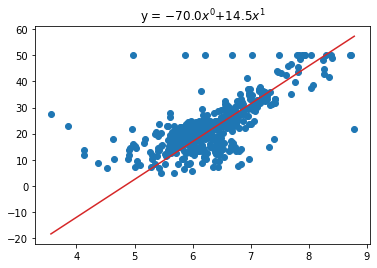

In [172]:
params = [14.5, -70.]

u3.plot_model(boston_two, params)


The regression line can't fit the data very well, because the samples scatter much. So they can't lay on one straight line.

Manually tweaking the model parameters $d$ and $k$ is a little bit of a hassle. Fortunately, there a better ways to find an appropriate <i>regression line</i>:

- Minimize the <i>mean squared error</i> of a degree $1$ <i>regression line</i>.
- Print the resulting parameter values of $d$ and $k$.
- Plot the resulting model and compare it with the <i>manually</i> tweaked version.

In [173]:
params = u3.minimize_MSE(boston_two, degree=1)
print(params)


[  9.1  -34.67]


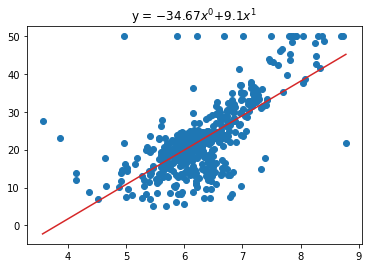

In [174]:
u3.plot_model(boston_two, params)


The line of the manually tweaked version seems to be steeper than the line of the computerized params. In conclusion, you can procress data roughly by eye. However, mechanical generated data examinations are more concrete.

As a <i>degree</i> of $1$ may not be the best choice for the corresponding <i>regression line</i>, experiment with different settings and <i>visualise</i> the resulting models. For this very purpose, you could try the following two approaches:

- Try to manually tweak the parameters (e.g. $[k_2, k_1, d]$ defines a degree $2$ regression model).
- Minimise the <i>mean squared error</i> for varying degrees and <i>automatically</i> find an appropriate model.

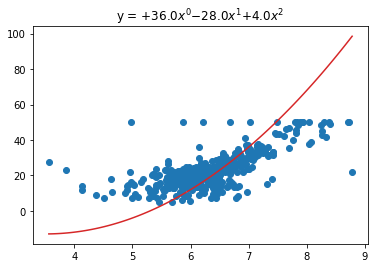

In [175]:
params = [4., -28., 36.] 
u3.plot_model(boston_two, params)

[  2.47 -22.64  66.06]


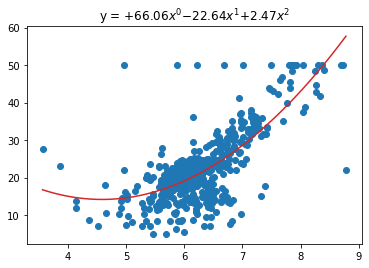

In [176]:
params = u3.minimize_MSE(boston_two, degree=2)
print(params)
u3.plot_model(boston_two, params)

[  -0.74   16.49 -109.39  241.31]


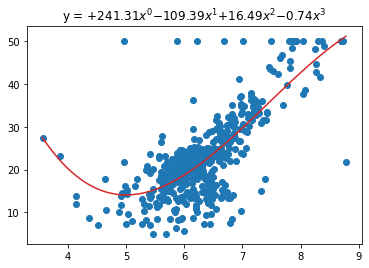

In [177]:
params = u3.minimize_MSE(boston_two, degree=3)
print(params)
u3.plot_model(boston_two, params)

[  -0.52   12.32 -103.66  371.46 -463.48]


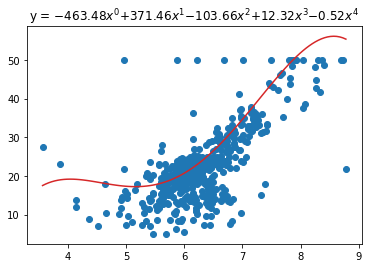

In [178]:
params = u3.minimize_MSE(boston_two, degree=4)
print(params)
u3.plot_model(boston_two, params)

[ 4.00000e-02 -1.65000e+00  2.92900e+01 -2.79400e+02  1.54447e+03
 -4.92163e+03  8.29678e+03 -5.60557e+03]


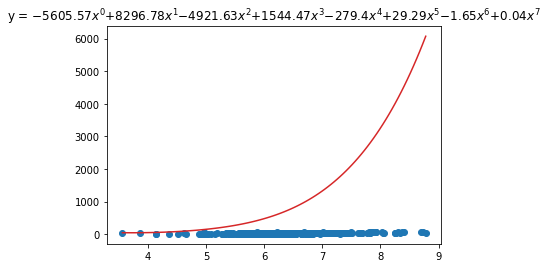

In [179]:
params = u3.minimize_MSE(boston_two, degree=7)
print(params)
u3.plot_model(boston_two, params)

To get a better feeling for the data set and <i>regression</i> in general, shift your focus to the two columns <code>LSTAT</code> and <code>target</code> and perform the same analysis steps as before, starting with:

- Plot the <i>boston</i> data set (keep in mind, which features to consider).
- Try to find appropriate model parameters $d$ and $k$.
- Plot the resulting model (keep in mind, which features to consider).

Is the resulting <i>regression line</i> a good <i>fit</i> for the underlying data?

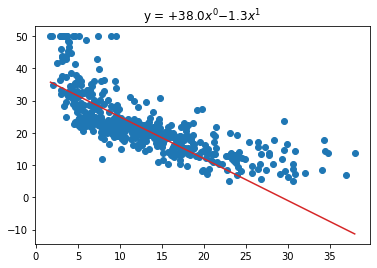

In [180]:
list_of_features_new = ['LSTAT', 'target']
boston_three = boston[list_of_features_new] 
params = [-1.3, 38.] 
u3.plot_model(boston_three, params)


Also, this regression line doesn't fit the data very well, because there is a curve in the dataset which is bulit through the sample points. Our model should also have a curve, but that isn't possible because it is only a linear line (because of linear regression).

Although manually tweaking $d$ and $k$ is still manageable, one does hit a wall pretty fast. Hence, try to <i>automatically</i> find an appropriate <i>regression line</i>:

- Minimize the <i>mean squared error</i> of a degree $1$ <i>regression line</i>.
- Print the resulting parameter values of $d$ and $k$.
- Plot the resulting model and compare it with the <i>manually</i> tweaked version.

[-0.95 34.55]


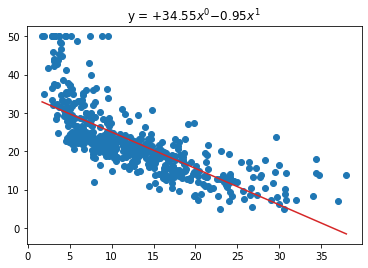

In [181]:
params = u3.minimize_MSE(boston_three, degree=1)
print(params)
u3.plot_model(boston_three, params)


The line of the manually tweaked version is similar to the automatically produced line, but it cut less sample points. 

Once again, experiment with different settings and <i>visualise</i> the resulting models. For this very purpose, you could try the following two approaches:

- Try to manually tweak the parameters (e.g. $[k_2, k_1, d]$ defines a degree $2$ regression model).
- Minimise the <i>mean squared error</i> for varying degrees and <i>automatically</i> find an appropriate model.

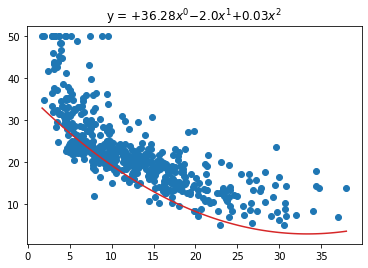

In [182]:
params = [0.03, -2., 36.28] # Punkt in sample anschauen, dann mit polynomial Funktion Stand so ausrechnen, dass
                            # man den y-Wert des Punkts erhält.
u3.plot_model(boston_three, params)


[ 4.000e-02 -2.330e+00  4.286e+01]


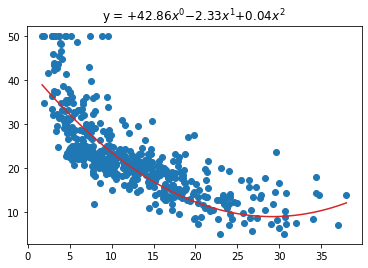

In [183]:
params = u3.minimize_MSE(boston_three, degree=2)
print(params)
u3.plot_model(boston_three, params)


[ 0.000e+00 -2.000e-02  5.000e-01 -7.030e+00  5.731e+01]


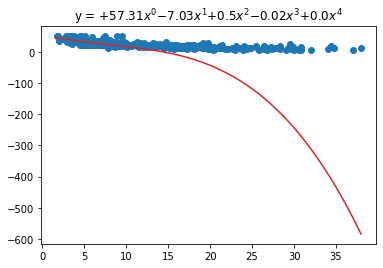

In [184]:
params = u3.minimize_MSE(boston_three, degree=4)
print(params)
u3.plot_model(boston_three, params)

[  0.    -0.     0.     0.    -0.08   1.49 -13.47  70.69]


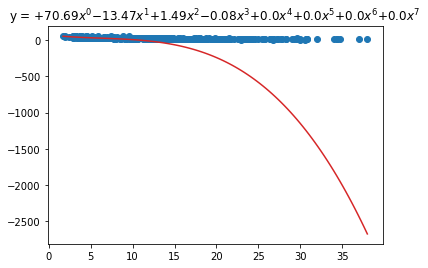

In [185]:
params = u3.minimize_MSE(boston_three, degree=7)
print(params)
u3.plot_model(boston_three, params)

[-0.    0.15 -3.87 48.65]


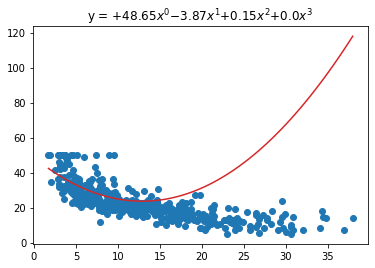

In [186]:
params = u3.minimize_MSE(boston_three, degree=3)
print(params)
u3.plot_model(boston_three, params)

# Exercise 2

Without any doubt, you have already realized, that you are working with <i>regression</i> data. To spice things up a little bit, we want to change that now, so the <b>first task</b> of this exercise is to transform the data set to a <i>classification</i> task. For this very purpose:

- Again, concentrate only on the columns <code>LSTAT</code> and <code>target</code> and create a <i>new</i> data set.
- Compare every sample with the <i>median</i> of the feature column.
- Set the target to be $0$ for every entry with a feature value <i>smaller</i> than the <i>median</i>, $1$ otherwise.

In [187]:
# dataframe als eigenes objekt und keine Liste # dataframe hat genau wie listen eigene Sachen, die man machen kann
list_of_features = boston[['LSTAT', 'target']] 
boston_new = list_of_features['LSTAT']
print('Median of LSTAT:', boston_new.median())

Median of LSTAT: 11.36


In [188]:
list_of_features.loc[list_of_features.LSTAT < 11.36, 'target'] = 0
list_of_features.loc[list_of_features.LSTAT >= 11.36, 'target'] = 1


As you are now working with a slightly different data set, polish up your knowledge by $\ldots$

- $\ldots$ looking at the first $n = 11$ samples.
- $\ldots$ plotting the newly constructed data set.

What do you observe (especially with respect to the plot)?

In [189]:
list_of_features.head(11)


,LSTAT,target
0,4.98,0.0
1,9.14,0.0
2,4.03,0.0
3,2.94,0.0
4,5.33,0.0
5,5.21,0.0
6,12.43,1.0
7,19.15,1.0
8,29.93,1.0
9,17.10,1.0


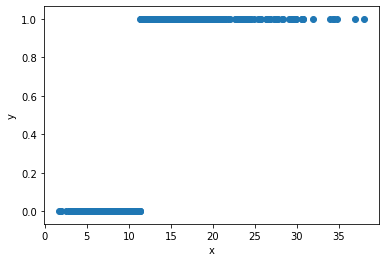

In [190]:
u3.plot_dataset(list_of_features)


There are only two labels now (0 and 1). All small x-values below 11.36 are classified as 0. All x-values above are labeled as 1. So, now we have a classification task and no longer a question of quantification. Therefore, linear regression isn't suitable anymore.

Up until now, we minimised the <i>mean squared error</i> to automatically find appropriate model parameters. The reason for this was the <i>nature</i> of the underlying model, which was <i>linear</i>. The <b>second task</b> of this exercise requires you to:

- Set the <i>random seed</i> to $s = 42$ using the <i>PyTorch</i> interface.
- Minimise the <i>cross entropy</i> using $n = 1000$ iterations, a learning rate of $0.1$ and a momentum term of $0.9$.
- Plot the resulting <i>logistic model</i> and experiment with different hyperparameter settings.

Keep in mind to use the newly constructed data set for this task, <i>not</i> the original one.

Model loss before optimization: 0.81
performing 1000 optimization steps with learning rate 0.1 ...
Model loss after optimization: 0.35


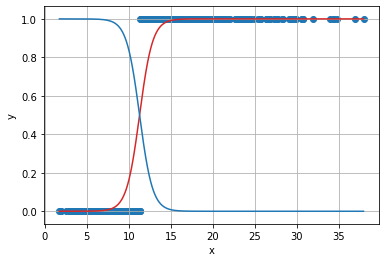

In [232]:
X = torch.rand(42) 

f = u3.minimize_CE(list_of_features, iters=1000, lr=0.1, momentum=0.9)
u3.plot_model_logistic(list_of_features, f)

Model loss before optimization: 0.71
performing 100 optimization steps with learning rate 0.1 ...
Model loss after optimization: 0.47


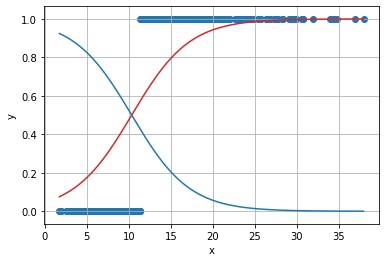

In [234]:

f = u3.minimize_CE(list_of_features, iters=100, lr=0.1, momentum=0.5)
u3.plot_model_logistic(list_of_features, f)


Model loss before optimization: 0.75
performing 10 optimization steps with learning rate 0.1 ...
Model loss after optimization: 0.67


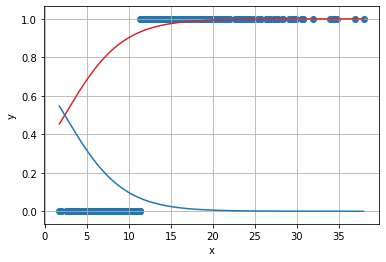

In [235]:
f = u3.minimize_CE(list_of_features, iters=10, lr=0.1, momentum=0.5)
u3.plot_model_logistic(list_of_features, f)


Model loss before optimization: 0.81
performing 1000 optimization steps with learning rate 0.9 ...
Model loss after optimization: 0.81


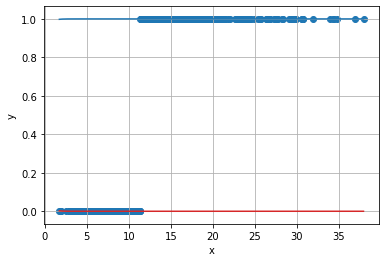

In [236]:
f = u3.minimize_CE(list_of_features, iters=1000, lr=0.9, momentum=0.9)
u3.plot_model_logistic(list_of_features, f)


The focus was set on <code>LSTAT</code> as the only feature column (to simplify the hands-on experience with <i>regressions</i>). By this time you are already an expert in analyzing the slimmed down data set, so as the next steps:

- Join the <i>original</i> data set with the customized <code>target</code> column.
- Keep in mind to <i>remove</i> or <i>overwrite</i> the original <code>target</code> column.
- Look at the first $n = 11$ samples of the data set.

In [195]:
boston = u3.load_boston()
newold_boston = pd.DataFrame(boston)
newold_boston.target = list_of_features['target']
newold_boston.head(11)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,0.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,0.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,0.0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,0.0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,0.0
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,0.0
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,1.0
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,1.0
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,1.0
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,1.0


Concentrating on manually chosen features may be a good start to get more familiar with the data set, but we are interested in using as many useful information as possible. Hence, it is always a good idea to look for <i>correlations</i> in the data, maybe some features <i>can</i> be dropped without loosing insightful details.

For this very purpose, display and analyze possible correlations in the data using the following features/columns:

- <code>INDUS</code>
- <code>CHAS</code>
- <code>RM</code>
- <code>TAX</code>
- <code>LSTAT</code>

Do you observe some correlations?

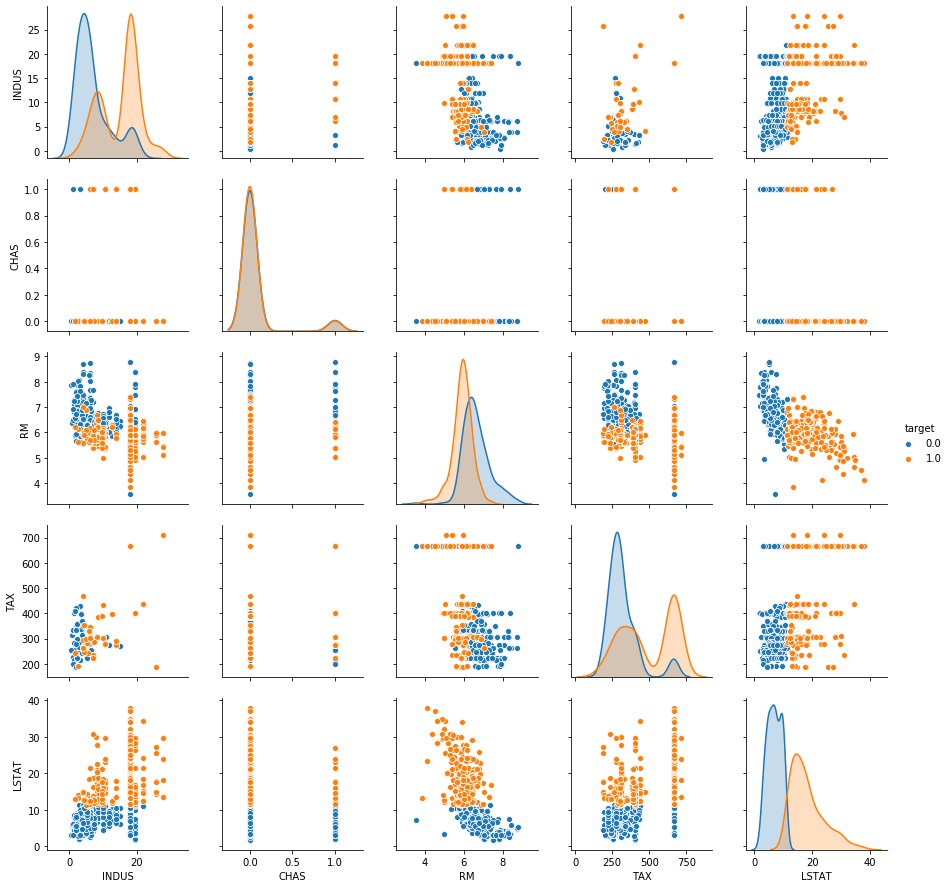

In [196]:
%matplotlib inline
important_features = ['INDUS', 'CHAS', 'RM', 'TAX', 'LSTAT']
sns.pairplot(newold_boston, vars=important_features, hue="target");

There aren't very good correlations. However, some feature pairs seperate the label data well. For instance, RM,LSTAT or TAX,LSTAT or INDUS, LSTAT.

With respect to the previous correlation plot, choose the <i>one</i> feature, which stands out the <i>most</i> compared to all others. Is this feature suitable for <i>discriminating</i> between the two <i>target</i> classes? Briefly discuss your answer. Moreover:

- Concentrate on the <i>previous</i> features, ignoring the one <i>chosen</i> according to the correlation plot.
- Apply <i>principal component analysis</i> for dimensionality reduction to $d = 2$ components.
- Create another data set comprising the two <i>components</i> as well as the <code>target</code> column.


- Look at the first $n = 11$ samples of the <i>new</i> data set.

In the earlier task we decided to use LSTAT as the determinator of the to labels one and two. So, we decided that it is important in seperating our data. Therefore you CAN'T say, that LSTAT is the best feature. Furtermore, the single features don't seperate very well. INDUS seems to be the best feature. When it correlates with itself, it can seperate the data with labels 0 and 1 more or less good. So it seems to be the best of the compared features. Finally, I will ignore LSTAT because it is much more interesting, how good the other features can discriminate between the labels. 

In [197]:
current_features_one = newold_boston[['INDUS','CHAS','RM','TAX']].to_numpy()

current_features_one_reduced_pca = u3.apply_PCA(n_components=2, data=current_features_one)
first = current_features_one_reduced_pca[['Component 1', 'Component 2']].to_numpy()


absolutely_new = pd.DataFrame(first) 
target = newold_boston[['target']].to_numpy()
absolutely_new['target'] = target
absolutely_new.head(11)



,0,1,target
0,-112.448132,-5.531014,0.0
1,-166.284938,0.815371,0.0
2,-166.285868,0.785356,0.0
3,-186.420529,-3.503825,0.0
4,-186.420710,-3.509678,0.0
5,-186.419837,-3.481510,0.0
6,-97.290736,-0.396322,1.0
7,-97.290931,-0.402608,1.0
8,-97.290272,-0.381354,1.0
9,-97.290726,-0.396008,1.0


As you are now working with a completely different data set, polish up your knowledge by $\ldots$

- $\ldots$ looking at the first $n = 11$ samples.
- $\ldots$ plotting the newly constructed data set using.

Keep in mind to set the <code>target</code> parameter appropriately in order to produce a <i>colored</i> scatter plot.

In [198]:
absolutely_new.head(11)

,0,1,target
0,-112.448132,-5.531014,0.0
1,-166.284938,0.815371,0.0
2,-166.285868,0.785356,0.0
3,-186.420529,-3.503825,0.0
4,-186.420710,-3.509678,0.0
5,-186.419837,-3.481510,0.0
6,-97.290736,-0.396322,1.0
7,-97.290931,-0.402608,1.0
8,-97.290272,-0.381354,1.0
9,-97.290726,-0.396008,1.0


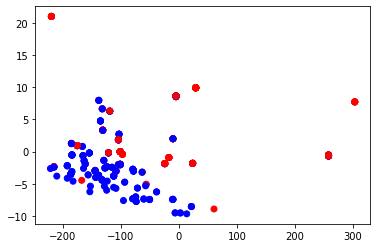

In [199]:
absolutely_bost = np.concatenate((first, target), 1)
color = ['red' if elem[2]==1 else 'blue' for elem in absolutely_bost]
plt.scatter(absolutely_bost[:,0], absolutely_bost[:,1], c = color)
plt.show()


As discussed during the lecture, before applying <i>any</i> algorithm, it is best to separate some samples, which act as the <i>test set</i>. Ultimately, we want to test our trained model on <i>unseen</i> data. Your <b>third task</b> of this exercise requires you to perform the following steps:

- Set the <i>random seed</i> to $s = 42$ using the <i>PyTorch</i> interface as well as the one of <i>numpy</i>.
- Split the <i>downprojected</i> data set in a way, so that the <i>test</i> set contains exactly $130$ samples.
- Minimise the <i>cross entropy</i> (<code>2D</code>) using $n = 1000$ iterations, a learning rate of $0.1$ and a momentum term of $0.9$.

Repeat the previous <i>three</i> steps multiple times, what do you observe? Briefly discuss a possible reason for this behavior.

In [200]:
X = torch.rand(42) 
n = np.random.seed(42)


In [201]:
from sklearn.model_selection import train_test_split
X = absolutely_bost[:,:-1]
y = absolutely_bost[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=130)


In [202]:
sol = u3.minimize_CE_2D(X_train, y_train, iters=1000, lr=0.1, momentum=0.9)
sol
# Unfortunately, it does not work. What is the reason for that?


Model loss before optimization: 13.88
performing 1000 optimization steps with learning rate 0.1 ...
Model loss after optimization: 215.14


model_2D(
  (l00): Linear(in_features=2, out_features=2, bias=True)
)

After training a model by <i>minimising</i> the <i>cross entropy</i>, apply said model once again on the <i>training</i> as well as on the  <i>test set</i>. Visualize the results in a <i>colored</i> scatter plot as discussed (shown) during the lecture.

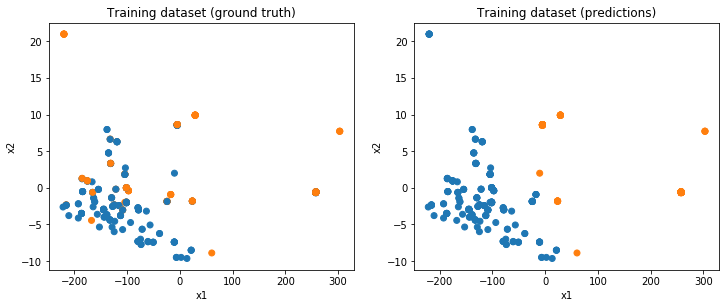

In [203]:
output_train = u3.apply_model(sol, X_train)
output_test = u3.apply_model(sol, X_test)

fig = plt.figure(figsize = (12, 10))
titles = [r'Training dataset (ground truth)', r'Training dataset (predictions)']
for plot_index, (title, data) in enumerate(zip(titles, (y_train, output_train))):
    plt.subplot(2, 2, plot_index + 1)
    color= [r'C1' if elem > 0.5 else r'C0' for elem in data]
    plt.scatter(X_train[:, 0], X_train[:, 1], c=color)
    plt.xlabel(r'x1')
    plt.ylabel(r'x2')
    plt.title(title)
    
plt.show()


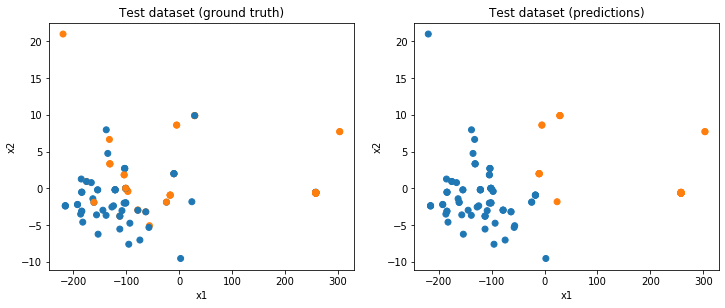

In [204]:
output_train = u3.apply_model(sol, X_train)
output_test = u3.apply_model(sol, X_test)

fig = plt.figure(figsize = (12, 10))
titles = [r'Test dataset (ground truth)', r'Test dataset (predictions)']
for plot_index, (title, data) in enumerate(zip(titles, (y_test, output_test))):
    plt.subplot(2, 2, plot_index + 1)
    color= [r'C1' if elem > 0.5 else r'C0' for elem in data]
    plt.scatter(X_test[:, 0], X_test[:, 1], c=color)
    plt.xlabel(r'x1')
    plt.ylabel(r'x2')
    plt.title(title)
    
plt.show()


# Exercise 3

During the lecture, a <i>framework</i> for supporting the development of scientific applications was introduced – <i>PyTorch</i>. As with a lot of interesting things, skill comes with practice (although you already touched said framework in the previous exercise). For this very purpose, your <b>first task</b> requires you to perform the following steps:

- Set the <i>random seed</i> to $s = 42$ using the <i>PyTorch</i> interface.
- Create a <i>tensor</i> with $[23 \cdot 130 \cdot 89]$ elements and fill it with random numbers.
- Print the <i>type</i> of the resulting tensor as well as the <i>number</i> of elements.

In [205]:
torch.rand(42) 


tensor([0.9729, 0.3821, 0.0892, 0.6124, 0.7762, 0.0023, 0.3865, 0.2003, 0.4563,
        0.2539, 0.2956, 0.3413, 0.0248, 0.9103, 0.9192, 0.4216, 0.4431, 0.2959,
        0.0485, 0.0134, 0.6858, 0.2255, 0.1786, 0.4610, 0.3335, 0.3382, 0.5161,
        0.3939, 0.3278, 0.2606, 0.0931, 0.9193, 0.2999, 0.6325, 0.3265, 0.5406,
        0.9662, 0.7304, 0.0667, 0.6985, 0.9746, 0.6315])

In [206]:
N, D, Z = 23, 130, 89
t = torch.rand(N*D*Z)
t


tensor([0.8352, 0.9929, 0.4234,  ..., 0.6541, 0.9602, 0.8124])

In [207]:
t.type() 


'torch.FloatTensor'

In [208]:
print(len(t))


266110


Now <i>reshape</i> the tensor to a <i>three dimensional</i> one, with the the first <i>two</i> dimensions set to $23$ and $130$. Moreover, once again, print the the <i>type</i> of the resulting tensor as well as the <i>number</i> of elements.

- If a <i>CUDA</i> device is available, move the tensor to said device.
- Print the <i>type</i> of the resulting tensor as well as on which <i>device</i> it lives.

In [209]:
if torch.cuda.is_available():
    t = t.to("cuda")
print(t.device)

cpu


In [210]:
t.reshape(23, 130, Z)
t.shape


torch.Size([266110])

In [211]:
print(t.type())

torch.FloatTensor


Your <b>second task</b> of this exercise is to experiment with the <i>automatic differentiation</i> functionality of the <i>PyTorch</i> framework. Given the following widely used function definition, the <i>Tangens hyperbolicus</i>, perform the following steps:

- Create a tensor with the value set to the <i>second</i> element of the very first list defined in <b>Exercise 0</b>.
- Set the <code>requires_grad</code> property appropriately (hint: we <i>are</i> requiring a gradient).
- Apply the <code>tanh</code> function on the newly created tensor.
- Compute the gradient of the <i>result</i> with respect to the input.

Report all <i>three</i> entities (<i>input</i>, <i>result</i> as well as <i>gradient</i> tensor) by printing them to the standard output.

In [212]:
new_tensor = torch.as_tensor([7, 2, 3], dtype=torch.float32)[1]
print("input: {}".format(new_tensor.item()))
new_tensor.requires_grad = True

def tanh(x: torch.Tensor) -> torch.Tensor:
    return (torch.exp(2 * x) - 1) / (torch.exp(2 * x) + 1)

apply_tanh = tanh(new_tensor)
print("result: {}".format(apply_tanh.item()))

grad = u3.grad(apply_tanh, new_tensor)
print("gradient: {}".format(grad[0].item()))


input: 2.0
result: 0.9640275835990906
gradient: 0.07065069675445557


Computing the <i>derivative</i> of a random scalar with respect to the input of a pretty small function is all well and good, but the <i>real</i> power of automatic differentiation lies in constructing the <i>gradient</i> of <i>complicated</i> functions with respect to <i>tensor</i> inputs. Hence, the <b>third</b> task of this exericse requires you to:

- Set the <i>random seed</i> to $s = 42$ using the <i>PyTorch</i> interface.
- Load the <i>cifar</i> data set (returns the <i>training</i> as well as the <i>test</i> set).
- Display the first <i>three</i> images of the <i>cifar</i> data set.

Can you identify possible <i>labels</i> of the three images?

In [213]:
torch.manual_seed(42)
training_set, test_set = u3.load_cifar()


Files already downloaded and verified
Files already downloaded and verified


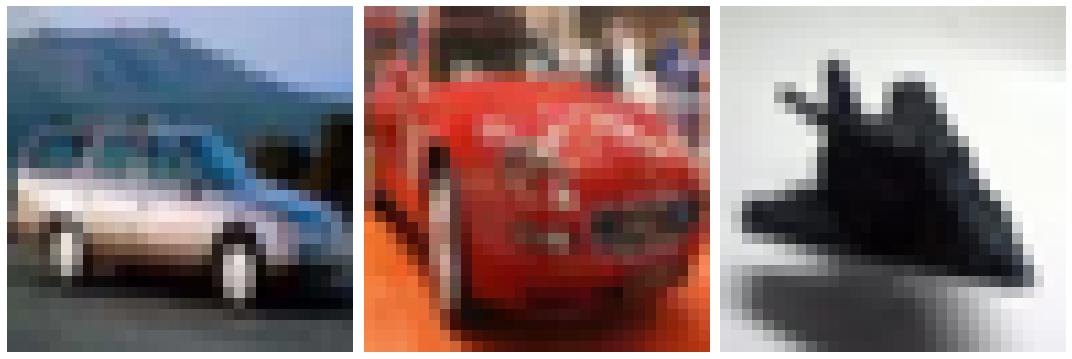

In [214]:
u3.display_CIFAR(training_set, 3)


The first two pictures fit to a label like car or vehicle. The last of the three pictures could be an airplane, bird or something else. Here it is hard to identify the object in the picture.

In order to define a <i>logistic regression</i> model for identifying images as visualized above, some minimal knowledge about the <i>structure</i> of the images is required:

- Find out the <i>input dimensionality</i> of the data set.
- Set the output dimensionality to be $d_{out} = 2$

In [215]:
train_shape = training_set[1][0].shape

input_dim = train_shape[0]*train_shape[1]*train_shape[2]
print("Input dimension: {}.".format(input_dim))
output_dim = 2


Input dimension: 3072.


Moreover, define an <i>instance</i> of the type <code>SimpleNamespace</code>, and set the hyperparameters accordingly:

- <code>batch_size = 64</code>
- <code>test_batch_size = 1000</code>
- <code>epochs = 15</code>
- <code>lr = 0.001</code>
- <code>momentum = 0.9</code>

The field <code>log_interval</code> can be chosen freely.

- Create additional instances of <code>DataLoader</code> for the <i>training</i> as well as the <i>test set</i> and enable <i>shuffling</i>.
- Create a <i>logistic regression</i> model, using the proper <i>input</i> and <i>output</i> dimensionalities.
- Create an optimizer of the type <code>SGD</code> and initialize it accordingly.



In [216]:
from types import SimpleNamespace
args = SimpleNamespace(batch_size = 64, test_batch_size = 1000, epochs = 15, lr = 0.001, momentum = 0.9, log_interval=5)


In [217]:
use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')

training_Loader = torch.utils.data.DataLoader(training_set,batch_size=args.batch_size, shuffle=True)
testing_Loader = torch.utils.data.DataLoader(test_set,batch_size=args.test_batch_size, shuffle=True)

model = u3.LogisticRegression(input_dim, output_dim).to(device)
optimizer = u3.optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum)


Train the previously defined <i>logistic regression</i> model by applying the corresponding <i>data loader</i> (keep in mind for which set we want the model to be <i>trained</i>) as well as the <i>optimizer</i>. Report the performance on the <i>test set</i> afterwards. Experiment with different hyperparameter settings, for instance set different values for $\ldots$

- $\ldots$ the learning rate <code>lr</code>.
- $\ldots$ the momentum term <code>momentum</code>.
- $\ldots$ the amount of epochs <code>epochs</code>.

Do you notice any serious differences? If yes, which <i>settings</i> lead to them? If not, try to argue about a <i>possible</i> reason.

In [218]:
for epoch in range(1, args.epochs + 1):
    u3.train(args, model, device, training_Loader, optimizer, epoch, input_dim)
    u3.test(args, model, device, testing_Loader, input_dim)
    

Train Epoch: 01 [320/10000 (3%)]	Loss: 0.669875
Train Epoch: 01 [640/10000 (6%)]	Loss: 0.650035
Train Epoch: 01 [960/10000 (10%)]	Loss: 0.566118
Train Epoch: 01 [1280/10000 (13%)]	Loss: 0.579147
Train Epoch: 01 [1600/10000 (16%)]	Loss: 0.528418
Train Epoch: 01 [1920/10000 (19%)]	Loss: 0.519693
Train Epoch: 01 [2240/10000 (22%)]	Loss: 0.511119
Train Epoch: 01 [2560/10000 (25%)]	Loss: 0.487474
Train Epoch: 01 [2880/10000 (29%)]	Loss: 0.512984
Train Epoch: 01 [3200/10000 (32%)]	Loss: 0.531501
Train Epoch: 01 [3520/10000 (35%)]	Loss: 0.512264
Train Epoch: 01 [3840/10000 (38%)]	Loss: 0.489519
Train Epoch: 01 [4160/10000 (41%)]	Loss: 0.499122
Train Epoch: 01 [4480/10000 (45%)]	Loss: 0.487579
Train Epoch: 01 [4800/10000 (48%)]	Loss: 0.440995
Train Epoch: 01 [5120/10000 (51%)]	Loss: 0.474501
Train Epoch: 01 [5440/10000 (54%)]	Loss: 0.395555
Train Epoch: 01 [5760/10000 (57%)]	Loss: 0.533026
Train Epoch: 01 [6080/10000 (61%)]	Loss: 0.589471
Train Epoch: 01 [6400/10000 (64%)]	Loss: 0.426677
Train

Train Epoch: 06 [3200/10000 (32%)]	Loss: 0.562674
Train Epoch: 06 [3520/10000 (35%)]	Loss: 0.414363
Train Epoch: 06 [3840/10000 (38%)]	Loss: 0.356666
Train Epoch: 06 [4160/10000 (41%)]	Loss: 0.499185
Train Epoch: 06 [4480/10000 (45%)]	Loss: 0.384936
Train Epoch: 06 [4800/10000 (48%)]	Loss: 0.424854
Train Epoch: 06 [5120/10000 (51%)]	Loss: 0.445133
Train Epoch: 06 [5440/10000 (54%)]	Loss: 0.442585
Train Epoch: 06 [5760/10000 (57%)]	Loss: 0.341823
Train Epoch: 06 [6080/10000 (61%)]	Loss: 0.332534
Train Epoch: 06 [6400/10000 (64%)]	Loss: 0.482580
Train Epoch: 06 [6720/10000 (67%)]	Loss: 0.431923
Train Epoch: 06 [7040/10000 (70%)]	Loss: 0.417781
Train Epoch: 06 [7360/10000 (73%)]	Loss: 0.376388
Train Epoch: 06 [7680/10000 (76%)]	Loss: 0.418440
Train Epoch: 06 [8000/10000 (80%)]	Loss: 0.545129
Train Epoch: 06 [8320/10000 (83%)]	Loss: 0.342810
Train Epoch: 06 [8640/10000 (86%)]	Loss: 0.407599
Train Epoch: 06 [8960/10000 (89%)]	Loss: 0.496163
Train Epoch: 06 [9280/10000 (92%)]	Loss: 0.406898


Train Epoch: 11 [6400/10000 (64%)]	Loss: 0.410657
Train Epoch: 11 [6720/10000 (67%)]	Loss: 0.384642
Train Epoch: 11 [7040/10000 (70%)]	Loss: 0.511222
Train Epoch: 11 [7360/10000 (73%)]	Loss: 0.427398
Train Epoch: 11 [7680/10000 (76%)]	Loss: 0.337348
Train Epoch: 11 [8000/10000 (80%)]	Loss: 0.511121
Train Epoch: 11 [8320/10000 (83%)]	Loss: 0.211589
Train Epoch: 11 [8640/10000 (86%)]	Loss: 0.516893
Train Epoch: 11 [8960/10000 (89%)]	Loss: 0.422979
Train Epoch: 11 [9280/10000 (92%)]	Loss: 0.395947
Train Epoch: 11 [9600/10000 (96%)]	Loss: 0.354766
Train Epoch: 11 [9920/10000 (99%)]	Loss: 0.365607
Train Epoch: 11 [10000/10000 (100%)]	Loss: 0.354376

Test set: Average loss: 0.4074, Accuracy: 1621/2000 (81.05%)

Train Epoch: 12 [320/10000 (3%)]	Loss: 0.342572
Train Epoch: 12 [640/10000 (6%)]	Loss: 0.432240
Train Epoch: 12 [960/10000 (10%)]	Loss: 0.458710
Train Epoch: 12 [1280/10000 (13%)]	Loss: 0.340084
Train Epoch: 12 [1600/10000 (16%)]	Loss: 0.425688
Train Epoch: 12 [1920/10000 (19%)]	Loss:

In [219]:
from types import SimpleNamespace
args = SimpleNamespace(batch_size = 64, test_batch_size = 1000, epochs = 15, lr = 0.001, momentum =.01, log_interval=5)
use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')
training_Loader = torch.utils.data.DataLoader(training_set,batch_size=args.batch_size, shuffle=True)
testing_Loader = torch.utils.data.DataLoader(test_set,batch_size=args.test_batch_size, shuffle=True)
model = u3.LogisticRegression(input_dim, output_dim).to(device)
optimizer = u3.optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum)
for epoch in range(1, args.epochs + 1):
    u3.train(args, model, device, training_Loader, optimizer, epoch, input_dim)
    u3.test(args, model, device, testing_Loader, input_dim)
    

Train Epoch: 01 [320/10000 (3%)]	Loss: 0.680832
Train Epoch: 01 [640/10000 (6%)]	Loss: 0.696904
Train Epoch: 01 [960/10000 (10%)]	Loss: 0.722140
Train Epoch: 01 [1280/10000 (13%)]	Loss: 0.688358
Train Epoch: 01 [1600/10000 (16%)]	Loss: 0.668900
Train Epoch: 01 [1920/10000 (19%)]	Loss: 0.687212
Train Epoch: 01 [2240/10000 (22%)]	Loss: 0.659623
Train Epoch: 01 [2560/10000 (25%)]	Loss: 0.601789
Train Epoch: 01 [2880/10000 (29%)]	Loss: 0.613423
Train Epoch: 01 [3200/10000 (32%)]	Loss: 0.655507
Train Epoch: 01 [3520/10000 (35%)]	Loss: 0.651933
Train Epoch: 01 [3840/10000 (38%)]	Loss: 0.622739
Train Epoch: 01 [4160/10000 (41%)]	Loss: 0.669097
Train Epoch: 01 [4480/10000 (45%)]	Loss: 0.633777
Train Epoch: 01 [4800/10000 (48%)]	Loss: 0.617653
Train Epoch: 01 [5120/10000 (51%)]	Loss: 0.622217
Train Epoch: 01 [5440/10000 (54%)]	Loss: 0.608860
Train Epoch: 01 [5760/10000 (57%)]	Loss: 0.617218
Train Epoch: 01 [6080/10000 (61%)]	Loss: 0.628196
Train Epoch: 01 [6400/10000 (64%)]	Loss: 0.679121
Train

Train Epoch: 06 [1280/10000 (13%)]	Loss: 0.476939
Train Epoch: 06 [1600/10000 (16%)]	Loss: 0.459594
Train Epoch: 06 [1920/10000 (19%)]	Loss: 0.438695
Train Epoch: 06 [2240/10000 (22%)]	Loss: 0.517139
Train Epoch: 06 [2560/10000 (25%)]	Loss: 0.466379
Train Epoch: 06 [2880/10000 (29%)]	Loss: 0.383622
Train Epoch: 06 [3200/10000 (32%)]	Loss: 0.545123
Train Epoch: 06 [3520/10000 (35%)]	Loss: 0.339603
Train Epoch: 06 [3840/10000 (38%)]	Loss: 0.471868
Train Epoch: 06 [4160/10000 (41%)]	Loss: 0.501030
Train Epoch: 06 [4480/10000 (45%)]	Loss: 0.409299
Train Epoch: 06 [4800/10000 (48%)]	Loss: 0.582491
Train Epoch: 06 [5120/10000 (51%)]	Loss: 0.482072
Train Epoch: 06 [5440/10000 (54%)]	Loss: 0.479016
Train Epoch: 06 [5760/10000 (57%)]	Loss: 0.544563
Train Epoch: 06 [6080/10000 (61%)]	Loss: 0.520697
Train Epoch: 06 [6400/10000 (64%)]	Loss: 0.501031
Train Epoch: 06 [6720/10000 (67%)]	Loss: 0.513160
Train Epoch: 06 [7040/10000 (70%)]	Loss: 0.502095
Train Epoch: 06 [7360/10000 (73%)]	Loss: 0.416640


Train Epoch: 11 [960/10000 (10%)]	Loss: 0.408903
Train Epoch: 11 [1280/10000 (13%)]	Loss: 0.392651
Train Epoch: 11 [1600/10000 (16%)]	Loss: 0.441031
Train Epoch: 11 [1920/10000 (19%)]	Loss: 0.599069
Train Epoch: 11 [2240/10000 (22%)]	Loss: 0.468864
Train Epoch: 11 [2560/10000 (25%)]	Loss: 0.483909
Train Epoch: 11 [2880/10000 (29%)]	Loss: 0.514299
Train Epoch: 11 [3200/10000 (32%)]	Loss: 0.406082
Train Epoch: 11 [3520/10000 (35%)]	Loss: 0.495732
Train Epoch: 11 [3840/10000 (38%)]	Loss: 0.418981
Train Epoch: 11 [4160/10000 (41%)]	Loss: 0.465405
Train Epoch: 11 [4480/10000 (45%)]	Loss: 0.533669
Train Epoch: 11 [4800/10000 (48%)]	Loss: 0.479183
Train Epoch: 11 [5120/10000 (51%)]	Loss: 0.420412
Train Epoch: 11 [5440/10000 (54%)]	Loss: 0.487891
Train Epoch: 11 [5760/10000 (57%)]	Loss: 0.480209
Train Epoch: 11 [6080/10000 (61%)]	Loss: 0.508055
Train Epoch: 11 [6400/10000 (64%)]	Loss: 0.375290
Train Epoch: 11 [6720/10000 (67%)]	Loss: 0.556300
Train Epoch: 11 [7040/10000 (70%)]	Loss: 0.399315
T

In [220]:
from types import SimpleNamespace
args = SimpleNamespace(batch_size = 64, test_batch_size = 1000, epochs = 15, lr = 0.4, momentum = 0.5, log_interval=5)
use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')
training_Loader = torch.utils.data.DataLoader(training_set,batch_size=args.batch_size, shuffle=True)
testing_Loader = torch.utils.data.DataLoader(test_set,batch_size=args.test_batch_size, shuffle=True)
model = u3.LogisticRegression(input_dim, output_dim).to(device)
optimizer = u3.optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum)
for epoch in range(1, 3):
    u3.train(args, model, device, training_Loader, optimizer, epoch, input_dim)
    u3.test(args, model, device, testing_Loader, input_dim)

Train Epoch: 01 [320/10000 (3%)]	Loss: 1.927068
Train Epoch: 01 [640/10000 (6%)]	Loss: 52.058605
Train Epoch: 01 [960/10000 (10%)]	Loss: 10.772548
Train Epoch: 01 [1280/10000 (13%)]	Loss: 83.145157
Train Epoch: 01 [1600/10000 (16%)]	Loss: 39.142963
Train Epoch: 01 [1920/10000 (19%)]	Loss: 39.604012
Train Epoch: 01 [2240/10000 (22%)]	Loss: 22.700525
Train Epoch: 01 [2560/10000 (25%)]	Loss: 13.051475
Train Epoch: 01 [2880/10000 (29%)]	Loss: 14.478062
Train Epoch: 01 [3200/10000 (32%)]	Loss: 12.371037
Train Epoch: 01 [3520/10000 (35%)]	Loss: 6.377549
Train Epoch: 01 [3840/10000 (38%)]	Loss: 11.570254
Train Epoch: 01 [4160/10000 (41%)]	Loss: 70.357216
Train Epoch: 01 [4480/10000 (45%)]	Loss: 5.989259
Train Epoch: 01 [4800/10000 (48%)]	Loss: 10.775743
Train Epoch: 01 [5120/10000 (51%)]	Loss: 36.410564
Train Epoch: 01 [5440/10000 (54%)]	Loss: 15.363467
Train Epoch: 01 [5760/10000 (57%)]	Loss: 11.245897
Train Epoch: 01 [6080/10000 (61%)]	Loss: 10.978843
Train Epoch: 01 [6400/10000 (64%)]	Loss

In [221]:
from types import SimpleNamespace
args = SimpleNamespace(batch_size = 64, test_batch_size = 1000, epochs = 15, lr = 0.4, momentum = 0.9, log_interval=5)
use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')
training_Loader = torch.utils.data.DataLoader(training_set,batch_size=args.batch_size, shuffle=True)
testing_Loader = torch.utils.data.DataLoader(test_set,batch_size=args.test_batch_size, shuffle=True)
model = u3.LogisticRegression(input_dim, output_dim).to(device)
optimizer = u3.optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum)
for epoch in range(1, 20):
    u3.train(args, model, device, training_Loader, optimizer, epoch, input_dim)
    u3.test(args, model, device, testing_Loader, input_dim)

Train Epoch: 01 [320/10000 (3%)]	Loss: 16.392513
Train Epoch: 01 [640/10000 (6%)]	Loss: 246.325439
Train Epoch: 01 [960/10000 (10%)]	Loss: 269.151489
Train Epoch: 01 [1280/10000 (13%)]	Loss: 202.592377
Train Epoch: 01 [1600/10000 (16%)]	Loss: 78.957497
Train Epoch: 01 [1920/10000 (19%)]	Loss: 83.953278
Train Epoch: 01 [2240/10000 (22%)]	Loss: 58.512653
Train Epoch: 01 [2560/10000 (25%)]	Loss: 74.804955
Train Epoch: 01 [2880/10000 (29%)]	Loss: 31.059505
Train Epoch: 01 [3200/10000 (32%)]	Loss: 128.096512
Train Epoch: 01 [3520/10000 (35%)]	Loss: 33.790550
Train Epoch: 01 [3840/10000 (38%)]	Loss: 33.394794
Train Epoch: 01 [4160/10000 (41%)]	Loss: 14.457677
Train Epoch: 01 [4480/10000 (45%)]	Loss: 30.387983
Train Epoch: 01 [4800/10000 (48%)]	Loss: 12.876014
Train Epoch: 01 [5120/10000 (51%)]	Loss: 42.598461
Train Epoch: 01 [5440/10000 (54%)]	Loss: 13.766208
Train Epoch: 01 [5760/10000 (57%)]	Loss: 41.898300
Train Epoch: 01 [6080/10000 (61%)]	Loss: 26.642818
Train Epoch: 01 [6400/10000 (64%

Train Epoch: 05 [9600/10000 (96%)]	Loss: 46.026901
Train Epoch: 05 [9920/10000 (99%)]	Loss: 11.644036
Train Epoch: 05 [10000/10000 (100%)]	Loss: 42.377289

Test set: Average loss: 45.5778, Accuracy: 1278/2000 (63.90%)

Train Epoch: 06 [320/10000 (3%)]	Loss: 44.133621
Train Epoch: 06 [640/10000 (6%)]	Loss: 53.020435
Train Epoch: 06 [960/10000 (10%)]	Loss: 16.748770
Train Epoch: 06 [1280/10000 (13%)]	Loss: 8.546003
Train Epoch: 06 [1600/10000 (16%)]	Loss: 10.971472
Train Epoch: 06 [1920/10000 (19%)]	Loss: 10.624535
Train Epoch: 06 [2240/10000 (22%)]	Loss: 7.597134
Train Epoch: 06 [2560/10000 (25%)]	Loss: 9.066303
Train Epoch: 06 [2880/10000 (29%)]	Loss: 9.350540
Train Epoch: 06 [3200/10000 (32%)]	Loss: 9.943085
Train Epoch: 06 [3520/10000 (35%)]	Loss: 11.597460
Train Epoch: 06 [3840/10000 (38%)]	Loss: 8.974595
Train Epoch: 06 [4160/10000 (41%)]	Loss: 7.834525
Train Epoch: 06 [4480/10000 (45%)]	Loss: 2.362231
Train Epoch: 06 [4800/10000 (48%)]	Loss: 13.604940
Train Epoch: 06 [5120/10000 (

Train Epoch: 11 [320/10000 (3%)]	Loss: 63.376450
Train Epoch: 11 [640/10000 (6%)]	Loss: 12.041549
Train Epoch: 11 [960/10000 (10%)]	Loss: 1.957640
Train Epoch: 11 [1280/10000 (13%)]	Loss: 31.000526
Train Epoch: 11 [1600/10000 (16%)]	Loss: 47.915855
Train Epoch: 11 [1920/10000 (19%)]	Loss: 16.349655
Train Epoch: 11 [2240/10000 (22%)]	Loss: 13.078809
Train Epoch: 11 [2560/10000 (25%)]	Loss: 10.955311
Train Epoch: 11 [2880/10000 (29%)]	Loss: 20.258104
Train Epoch: 11 [3200/10000 (32%)]	Loss: 10.787979
Train Epoch: 11 [3520/10000 (35%)]	Loss: 19.905439
Train Epoch: 11 [3840/10000 (38%)]	Loss: 13.263575
Train Epoch: 11 [4160/10000 (41%)]	Loss: 13.143856
Train Epoch: 11 [4480/10000 (45%)]	Loss: 9.902679
Train Epoch: 11 [4800/10000 (48%)]	Loss: 8.862237
Train Epoch: 11 [5120/10000 (51%)]	Loss: 8.001922
Train Epoch: 11 [5440/10000 (54%)]	Loss: 3.220027
Train Epoch: 11 [5760/10000 (57%)]	Loss: 22.006096
Train Epoch: 11 [6080/10000 (61%)]	Loss: 11.652466
Train Epoch: 11 [6400/10000 (64%)]	Loss: 

Train Epoch: 16 [3520/10000 (35%)]	Loss: 15.002086
Train Epoch: 16 [3840/10000 (38%)]	Loss: 9.189357
Train Epoch: 16 [4160/10000 (41%)]	Loss: 25.034611
Train Epoch: 16 [4480/10000 (45%)]	Loss: 5.320613
Train Epoch: 16 [4800/10000 (48%)]	Loss: 9.765154
Train Epoch: 16 [5120/10000 (51%)]	Loss: 8.828732
Train Epoch: 16 [5440/10000 (54%)]	Loss: 13.306355
Train Epoch: 16 [5760/10000 (57%)]	Loss: 11.252267
Train Epoch: 16 [6080/10000 (61%)]	Loss: 10.575220
Train Epoch: 16 [6400/10000 (64%)]	Loss: 9.974662
Train Epoch: 16 [6720/10000 (67%)]	Loss: 12.052814
Train Epoch: 16 [7040/10000 (70%)]	Loss: 12.338090
Train Epoch: 16 [7360/10000 (73%)]	Loss: 28.469444
Train Epoch: 16 [7680/10000 (76%)]	Loss: 11.572145
Train Epoch: 16 [8000/10000 (80%)]	Loss: 14.079478
Train Epoch: 16 [8320/10000 (83%)]	Loss: 11.303164
Train Epoch: 16 [8640/10000 (86%)]	Loss: 16.194687
Train Epoch: 16 [8960/10000 (89%)]	Loss: 16.991325
Train Epoch: 16 [9280/10000 (92%)]	Loss: 9.304038
Train Epoch: 16 [9600/10000 (96%)]	Lo

Do you notice any serious differences? If yes, which settings lead to them? If not, try to argue about a possible reason.
--> When the learning rate is too high, important informations about the real underlying function are lost. Therefore the accuracy descreases.
--> With more epochs you get a better feeling, how accurate your model really is. One runaway isn't important anymore in interpretation. 
--> Also, a too small momentum can lead to a fewer accuracy.

As already discussing during the lecture, simply <i>inverting</i> the original images on which the model is trained, may already be enough to break it. To show this behavior, perform the following steps:

- Set the <i>random seed</i> to $s = 42$ using the <i>PyTorch</i> interface.
- Load the <i>cifar</i> data set with a <code>flip_probability</code> of $p = 1$.
- Display the first <i>three</i> images of the <i>cifar</i> data set.

Can you identify possible <i>labels</i> of the three images? How do they differ from the previous visualisation?

- Repeat the previous <i>training</i> and <i>testing</i> procedure.

In [222]:
from types import SimpleNamespace
args = SimpleNamespace(batch_size = 64, test_batch_size = 1000, epochs = 15, lr = 0.001, momentum = 1., log_interval=5)
use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')
training_Loader = torch.utils.data.DataLoader(training_set,batch_size=args.batch_size, shuffle=True)
testing_Loader = torch.utils.data.DataLoader(test_set,batch_size=args.test_batch_size, shuffle=True)
model = u3.LogisticRegression(input_dim, output_dim).to(device)
optimizer = u3.optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum)
for epoch in range(1, args.epochs + 1):
    u3.train(args, model, device, training_Loader, optimizer, epoch, input_dim)
    u3.test(args, model, device, testing_Loader, input_dim)
    

Train Epoch: 01 [320/10000 (3%)]	Loss: 0.753103
Train Epoch: 01 [640/10000 (6%)]	Loss: 1.100661
Train Epoch: 01 [960/10000 (10%)]	Loss: 1.043764
Train Epoch: 01 [1280/10000 (13%)]	Loss: 0.704924
Train Epoch: 01 [1600/10000 (16%)]	Loss: 0.574478
Train Epoch: 01 [1920/10000 (19%)]	Loss: 0.625417
Train Epoch: 01 [2240/10000 (22%)]	Loss: 0.701839
Train Epoch: 01 [2560/10000 (25%)]	Loss: 0.865312
Train Epoch: 01 [2880/10000 (29%)]	Loss: 0.409203
Train Epoch: 01 [3200/10000 (32%)]	Loss: 0.618403
Train Epoch: 01 [3520/10000 (35%)]	Loss: 0.740179
Train Epoch: 01 [3840/10000 (38%)]	Loss: 0.525427
Train Epoch: 01 [4160/10000 (41%)]	Loss: 0.904856
Train Epoch: 01 [4480/10000 (45%)]	Loss: 0.861898
Train Epoch: 01 [4800/10000 (48%)]	Loss: 0.899188
Train Epoch: 01 [5120/10000 (51%)]	Loss: 0.785621
Train Epoch: 01 [5440/10000 (54%)]	Loss: 0.987707
Train Epoch: 01 [5760/10000 (57%)]	Loss: 0.946039
Train Epoch: 01 [6080/10000 (61%)]	Loss: 0.544452
Train Epoch: 01 [6400/10000 (64%)]	Loss: 1.077796
Train

Train Epoch: 06 [2240/10000 (22%)]	Loss: 0.630410
Train Epoch: 06 [2560/10000 (25%)]	Loss: 2.052531
Train Epoch: 06 [2880/10000 (29%)]	Loss: 2.465406
Train Epoch: 06 [3200/10000 (32%)]	Loss: 1.867027
Train Epoch: 06 [3520/10000 (35%)]	Loss: 1.431245
Train Epoch: 06 [3840/10000 (38%)]	Loss: 3.850003
Train Epoch: 06 [4160/10000 (41%)]	Loss: 3.862646
Train Epoch: 06 [4480/10000 (45%)]	Loss: 0.953162
Train Epoch: 06 [4800/10000 (48%)]	Loss: 2.556797
Train Epoch: 06 [5120/10000 (51%)]	Loss: 2.948318
Train Epoch: 06 [5440/10000 (54%)]	Loss: 2.035756
Train Epoch: 06 [5760/10000 (57%)]	Loss: 1.624078
Train Epoch: 06 [6080/10000 (61%)]	Loss: 2.159438
Train Epoch: 06 [6400/10000 (64%)]	Loss: 4.026897
Train Epoch: 06 [6720/10000 (67%)]	Loss: 2.315732
Train Epoch: 06 [7040/10000 (70%)]	Loss: 1.847399
Train Epoch: 06 [7360/10000 (73%)]	Loss: 2.299400
Train Epoch: 06 [7680/10000 (76%)]	Loss: 2.403850
Train Epoch: 06 [8000/10000 (80%)]	Loss: 1.764802
Train Epoch: 06 [8320/10000 (83%)]	Loss: 1.323275


Train Epoch: 11 [2560/10000 (25%)]	Loss: 6.477691
Train Epoch: 11 [2880/10000 (29%)]	Loss: 4.468042
Train Epoch: 11 [3200/10000 (32%)]	Loss: 4.832866
Train Epoch: 11 [3520/10000 (35%)]	Loss: 11.485757
Train Epoch: 11 [3840/10000 (38%)]	Loss: 9.947166
Train Epoch: 11 [4160/10000 (41%)]	Loss: 4.721334
Train Epoch: 11 [4480/10000 (45%)]	Loss: 2.184735
Train Epoch: 11 [4800/10000 (48%)]	Loss: 12.785462
Train Epoch: 11 [5120/10000 (51%)]	Loss: 10.706551
Train Epoch: 11 [5440/10000 (54%)]	Loss: 6.417165
Train Epoch: 11 [5760/10000 (57%)]	Loss: 7.776761
Train Epoch: 11 [6080/10000 (61%)]	Loss: 2.943662
Train Epoch: 11 [6400/10000 (64%)]	Loss: 3.100145
Train Epoch: 11 [6720/10000 (67%)]	Loss: 5.980185
Train Epoch: 11 [7040/10000 (70%)]	Loss: 9.041004
Train Epoch: 11 [7360/10000 (73%)]	Loss: 4.508367
Train Epoch: 11 [7680/10000 (76%)]	Loss: 5.090528
Train Epoch: 11 [8000/10000 (80%)]	Loss: 5.979327
Train Epoch: 11 [8320/10000 (83%)]	Loss: 9.177974
Train Epoch: 11 [8640/10000 (86%)]	Loss: 7.6606

Files already downloaded and verified
Files already downloaded and verified


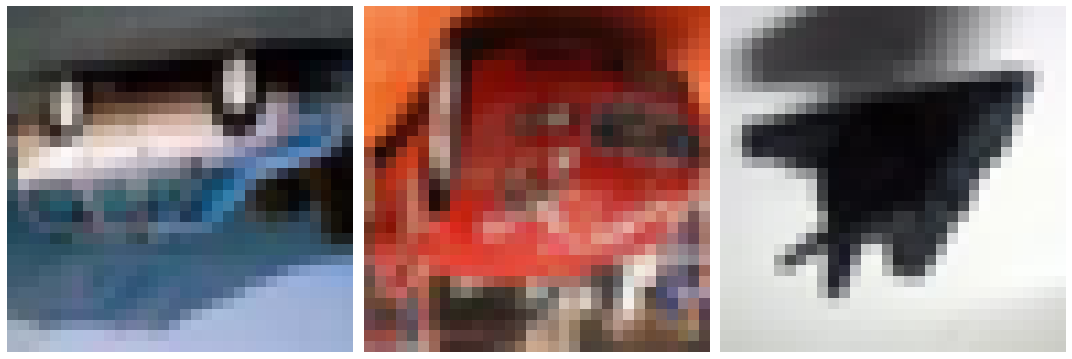

In [223]:
torch.manual_seed(42)

training_set, test_set_new = u3.load_cifar(1.0)
u3.display_CIFAR(training_set, 3)

I see the same as before (cars and maybe a airplane). However, the first picture is obvious, for the second one I would have to think over it, if I didn't know the original picutre.

In [224]:
train_shape = training_set[1][0].shape

input_dim = train_shape[0]*train_shape[1]*train_shape[2]
print("Input dimension: {}.".format(input_dim))
output_dim = 2


Input dimension: 3072.


In [225]:
from types import SimpleNamespace
args = SimpleNamespace(batch_size = 64, test_batch_size = 1000, epochs = 15, lr = 0.001, momentum = 0.9, log_interval=5)
use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')
training_Loader = torch.utils.data.DataLoader(training_set,batch_size=args.batch_size, shuffle=True)
testing_Loader_new = torch.utils.data.DataLoader(test_set_new,batch_size=args.test_batch_size, shuffle=True)
model_flipped = u3.LogisticRegression(input_dim, output_dim).to(device)
optimizer = u3.optim.SGD(model_flipped.parameters(), lr=args.lr, momentum=args.momentum)
for epoch in range(1, args.epochs + 1):
    u3.train(args, model_flipped, device, training_Loader, optimizer, epoch, input_dim)
    u3.test(args, model_flipped, device, testing_Loader_new, input_dim)
    

Train Epoch: 01 [320/10000 (3%)]	Loss: 0.644469
Train Epoch: 01 [640/10000 (6%)]	Loss: 0.647495
Train Epoch: 01 [960/10000 (10%)]	Loss: 0.551778
Train Epoch: 01 [1280/10000 (13%)]	Loss: 0.577315
Train Epoch: 01 [1600/10000 (16%)]	Loss: 0.552143
Train Epoch: 01 [1920/10000 (19%)]	Loss: 0.526169
Train Epoch: 01 [2240/10000 (22%)]	Loss: 0.510311
Train Epoch: 01 [2560/10000 (25%)]	Loss: 0.487407
Train Epoch: 01 [2880/10000 (29%)]	Loss: 0.494994
Train Epoch: 01 [3200/10000 (32%)]	Loss: 0.530417
Train Epoch: 01 [3520/10000 (35%)]	Loss: 0.516578
Train Epoch: 01 [3840/10000 (38%)]	Loss: 0.491846
Train Epoch: 01 [4160/10000 (41%)]	Loss: 0.507204
Train Epoch: 01 [4480/10000 (45%)]	Loss: 0.499637
Train Epoch: 01 [4800/10000 (48%)]	Loss: 0.440325
Train Epoch: 01 [5120/10000 (51%)]	Loss: 0.475002
Train Epoch: 01 [5440/10000 (54%)]	Loss: 0.396736
Train Epoch: 01 [5760/10000 (57%)]	Loss: 0.534032
Train Epoch: 01 [6080/10000 (61%)]	Loss: 0.599877
Train Epoch: 01 [6400/10000 (64%)]	Loss: 0.423152
Train

Train Epoch: 06 [1600/10000 (16%)]	Loss: 0.526251
Train Epoch: 06 [1920/10000 (19%)]	Loss: 0.332879
Train Epoch: 06 [2240/10000 (22%)]	Loss: 0.470434
Train Epoch: 06 [2560/10000 (25%)]	Loss: 0.551957
Train Epoch: 06 [2880/10000 (29%)]	Loss: 0.447405
Train Epoch: 06 [3200/10000 (32%)]	Loss: 0.565467
Train Epoch: 06 [3520/10000 (35%)]	Loss: 0.408178
Train Epoch: 06 [3840/10000 (38%)]	Loss: 0.351157
Train Epoch: 06 [4160/10000 (41%)]	Loss: 0.504670
Train Epoch: 06 [4480/10000 (45%)]	Loss: 0.384943
Train Epoch: 06 [4800/10000 (48%)]	Loss: 0.424302
Train Epoch: 06 [5120/10000 (51%)]	Loss: 0.443651
Train Epoch: 06 [5440/10000 (54%)]	Loss: 0.452609
Train Epoch: 06 [5760/10000 (57%)]	Loss: 0.337787
Train Epoch: 06 [6080/10000 (61%)]	Loss: 0.331842
Train Epoch: 06 [6400/10000 (64%)]	Loss: 0.479684
Train Epoch: 06 [6720/10000 (67%)]	Loss: 0.428204
Train Epoch: 06 [7040/10000 (70%)]	Loss: 0.427397
Train Epoch: 06 [7360/10000 (73%)]	Loss: 0.374929
Train Epoch: 06 [7680/10000 (76%)]	Loss: 0.424936


Train Epoch: 11 [6080/10000 (61%)]	Loss: 0.476647
Train Epoch: 11 [6400/10000 (64%)]	Loss: 0.412306
Train Epoch: 11 [6720/10000 (67%)]	Loss: 0.382575
Train Epoch: 11 [7040/10000 (70%)]	Loss: 0.510596
Train Epoch: 11 [7360/10000 (73%)]	Loss: 0.424629
Train Epoch: 11 [7680/10000 (76%)]	Loss: 0.333198
Train Epoch: 11 [8000/10000 (80%)]	Loss: 0.512336
Train Epoch: 11 [8320/10000 (83%)]	Loss: 0.212062
Train Epoch: 11 [8640/10000 (86%)]	Loss: 0.512943
Train Epoch: 11 [8960/10000 (89%)]	Loss: 0.426603
Train Epoch: 11 [9280/10000 (92%)]	Loss: 0.396289
Train Epoch: 11 [9600/10000 (96%)]	Loss: 0.353108
Train Epoch: 11 [9920/10000 (99%)]	Loss: 0.363659
Train Epoch: 11 [10000/10000 (100%)]	Loss: 0.345840

Test set: Average loss: 0.4066, Accuracy: 1620/2000 (81.00%)

Train Epoch: 12 [320/10000 (3%)]	Loss: 0.340564
Train Epoch: 12 [640/10000 (6%)]	Loss: 0.436874
Train Epoch: 12 [960/10000 (10%)]	Loss: 0.447916
Train Epoch: 12 [1280/10000 (13%)]	Loss: 0.342315
Train Epoch: 12 [1600/10000 (16%)]	Loss:

In [226]:
from types import SimpleNamespace
args = SimpleNamespace(batch_size = 64, test_batch_size = 1000, epochs = 15, lr = 0.001, momentum = 1., log_interval=5)
use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')
training_Loader = torch.utils.data.DataLoader(training_set,batch_size=args.batch_size, shuffle=True)
testing_Loader_new = torch.utils.data.DataLoader(test_set_new,batch_size=args.test_batch_size, shuffle=True)
model_flipped = u3.LogisticRegression(input_dim, output_dim).to(device)
optimizer = u3.optim.SGD(model_flipped.parameters(), lr=args.lr, momentum=args.momentum)
for epoch in range(1, args.epochs + 1):
    u3.train(args, model_flipped, device, training_Loader, optimizer, epoch, input_dim)
    u3.test(args, model_flipped, device, testing_Loader_new, input_dim)
    

Train Epoch: 01 [320/10000 (3%)]	Loss: 0.799407
Train Epoch: 01 [640/10000 (6%)]	Loss: 0.794938
Train Epoch: 01 [960/10000 (10%)]	Loss: 0.926381
Train Epoch: 01 [1280/10000 (13%)]	Loss: 0.894100
Train Epoch: 01 [1600/10000 (16%)]	Loss: 0.702408
Train Epoch: 01 [1920/10000 (19%)]	Loss: 0.551222
Train Epoch: 01 [2240/10000 (22%)]	Loss: 0.546061
Train Epoch: 01 [2560/10000 (25%)]	Loss: 0.679508
Train Epoch: 01 [2880/10000 (29%)]	Loss: 0.425261
Train Epoch: 01 [3200/10000 (32%)]	Loss: 0.747731
Train Epoch: 01 [3520/10000 (35%)]	Loss: 0.739828
Train Epoch: 01 [3840/10000 (38%)]	Loss: 0.407184
Train Epoch: 01 [4160/10000 (41%)]	Loss: 1.330202
Train Epoch: 01 [4480/10000 (45%)]	Loss: 0.425654
Train Epoch: 01 [4800/10000 (48%)]	Loss: 1.287691
Train Epoch: 01 [5120/10000 (51%)]	Loss: 0.607033
Train Epoch: 01 [5440/10000 (54%)]	Loss: 1.036004
Train Epoch: 01 [5760/10000 (57%)]	Loss: 0.737981
Train Epoch: 01 [6080/10000 (61%)]	Loss: 0.958446
Train Epoch: 01 [6400/10000 (64%)]	Loss: 1.228672
Train

Train Epoch: 06 [4800/10000 (48%)]	Loss: 7.651738
Train Epoch: 06 [5120/10000 (51%)]	Loss: 4.565652
Train Epoch: 06 [5440/10000 (54%)]	Loss: 2.454210
Train Epoch: 06 [5760/10000 (57%)]	Loss: 5.468234
Train Epoch: 06 [6080/10000 (61%)]	Loss: 7.566985
Train Epoch: 06 [6400/10000 (64%)]	Loss: 5.739972
Train Epoch: 06 [6720/10000 (67%)]	Loss: 3.969784
Train Epoch: 06 [7040/10000 (70%)]	Loss: 4.232719
Train Epoch: 06 [7360/10000 (73%)]	Loss: 4.898920
Train Epoch: 06 [7680/10000 (76%)]	Loss: 3.631049
Train Epoch: 06 [8000/10000 (80%)]	Loss: 5.471820
Train Epoch: 06 [8320/10000 (83%)]	Loss: 3.005779
Train Epoch: 06 [8640/10000 (86%)]	Loss: 4.538465
Train Epoch: 06 [8960/10000 (89%)]	Loss: 6.313943
Train Epoch: 06 [9280/10000 (92%)]	Loss: 3.966583
Train Epoch: 06 [9600/10000 (96%)]	Loss: 5.694396
Train Epoch: 06 [9920/10000 (99%)]	Loss: 2.376981
Train Epoch: 06 [10000/10000 (100%)]	Loss: 1.163162

Test set: Average loss: 3.6500, Accuracy: 1568/2000 (78.40%)

Train Epoch: 07 [320/10000 (3%)]	Lo

Train Epoch: 11 [9600/10000 (96%)]	Loss: 16.984348
Train Epoch: 11 [9920/10000 (99%)]	Loss: 16.607698
Train Epoch: 11 [10000/10000 (100%)]	Loss: 20.482643

Test set: Average loss: 9.8467, Accuracy: 1417/2000 (70.85%)

Train Epoch: 12 [320/10000 (3%)]	Loss: 3.906469
Train Epoch: 12 [640/10000 (6%)]	Loss: 7.248055
Train Epoch: 12 [960/10000 (10%)]	Loss: 8.208874
Train Epoch: 12 [1280/10000 (13%)]	Loss: 10.998499
Train Epoch: 12 [1600/10000 (16%)]	Loss: 21.992517
Train Epoch: 12 [1920/10000 (19%)]	Loss: 14.047398
Train Epoch: 12 [2240/10000 (22%)]	Loss: 14.915730
Train Epoch: 12 [2560/10000 (25%)]	Loss: 9.102190
Train Epoch: 12 [2880/10000 (29%)]	Loss: 4.335716
Train Epoch: 12 [3200/10000 (32%)]	Loss: 4.886250
Train Epoch: 12 [3520/10000 (35%)]	Loss: 9.052970
Train Epoch: 12 [3840/10000 (38%)]	Loss: 13.639540
Train Epoch: 12 [4160/10000 (41%)]	Loss: 18.876247
Train Epoch: 12 [4480/10000 (45%)]	Loss: 16.536690
Train Epoch: 12 [4800/10000 (48%)]	Loss: 11.840048
Train Epoch: 12 [5120/10000 (

In [227]:
from types import SimpleNamespace
args = SimpleNamespace(batch_size = 64, test_batch_size = 1000, epochs = 15, lr = 0.001, momentum = 1., log_interval=5)
use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')
training_Loader = torch.utils.data.DataLoader(training_set,batch_size=args.batch_size, shuffle=True)
testing_Loader_new = torch.utils.data.DataLoader(test_set_new,batch_size=args.test_batch_size, shuffle=True)
model_flipped = u3.LogisticRegression(input_dim, output_dim).to(device)
optimizer = u3.optim.SGD(model_flipped.parameters(), lr=args.lr, momentum=args.momentum)
for epoch in range(1, args.epochs + 1):
    u3.train(args, model_flipped, device, training_Loader, optimizer, epoch, input_dim)
    u3.test(args, model_flipped, device, testing_Loader_new, input_dim)
    

Train Epoch: 01 [320/10000 (3%)]	Loss: 0.738067
Train Epoch: 01 [640/10000 (6%)]	Loss: 0.779732
Train Epoch: 01 [960/10000 (10%)]	Loss: 0.864661
Train Epoch: 01 [1280/10000 (13%)]	Loss: 0.702750
Train Epoch: 01 [1600/10000 (16%)]	Loss: 0.554551
Train Epoch: 01 [1920/10000 (19%)]	Loss: 0.439253
Train Epoch: 01 [2240/10000 (22%)]	Loss: 0.442643
Train Epoch: 01 [2560/10000 (25%)]	Loss: 0.884916
Train Epoch: 01 [2880/10000 (29%)]	Loss: 0.568735
Train Epoch: 01 [3200/10000 (32%)]	Loss: 0.493308
Train Epoch: 01 [3520/10000 (35%)]	Loss: 1.008376
Train Epoch: 01 [3840/10000 (38%)]	Loss: 0.896760
Train Epoch: 01 [4160/10000 (41%)]	Loss: 1.025237
Train Epoch: 01 [4480/10000 (45%)]	Loss: 1.119632
Train Epoch: 01 [4800/10000 (48%)]	Loss: 0.839913
Train Epoch: 01 [5120/10000 (51%)]	Loss: 1.039284
Train Epoch: 01 [5440/10000 (54%)]	Loss: 1.030400
Train Epoch: 01 [5760/10000 (57%)]	Loss: 1.359377
Train Epoch: 01 [6080/10000 (61%)]	Loss: 0.640473
Train Epoch: 01 [6400/10000 (64%)]	Loss: 1.159279
Train

Train Epoch: 06 [960/10000 (10%)]	Loss: 2.757310
Train Epoch: 06 [1280/10000 (13%)]	Loss: 3.706013
Train Epoch: 06 [1600/10000 (16%)]	Loss: 1.652158
Train Epoch: 06 [1920/10000 (19%)]	Loss: 1.063196
Train Epoch: 06 [2240/10000 (22%)]	Loss: 2.598069
Train Epoch: 06 [2560/10000 (25%)]	Loss: 2.030309
Train Epoch: 06 [2880/10000 (29%)]	Loss: 2.372609
Train Epoch: 06 [3200/10000 (32%)]	Loss: 1.846914
Train Epoch: 06 [3520/10000 (35%)]	Loss: 4.653678
Train Epoch: 06 [3840/10000 (38%)]	Loss: 2.427192
Train Epoch: 06 [4160/10000 (41%)]	Loss: 1.862661
Train Epoch: 06 [4480/10000 (45%)]	Loss: 1.227248
Train Epoch: 06 [4800/10000 (48%)]	Loss: 3.649300
Train Epoch: 06 [5120/10000 (51%)]	Loss: 3.554268
Train Epoch: 06 [5440/10000 (54%)]	Loss: 2.436443
Train Epoch: 06 [5760/10000 (57%)]	Loss: 1.278422
Train Epoch: 06 [6080/10000 (61%)]	Loss: 4.216184
Train Epoch: 06 [6400/10000 (64%)]	Loss: 3.444381
Train Epoch: 06 [6720/10000 (67%)]	Loss: 4.163886
Train Epoch: 06 [7040/10000 (70%)]	Loss: 1.657197
T

Train Epoch: 11 [320/10000 (3%)]	Loss: 4.113465
Train Epoch: 11 [640/10000 (6%)]	Loss: 6.176022
Train Epoch: 11 [960/10000 (10%)]	Loss: 2.439776
Train Epoch: 11 [1280/10000 (13%)]	Loss: 2.790586
Train Epoch: 11 [1600/10000 (16%)]	Loss: 2.453968
Train Epoch: 11 [1920/10000 (19%)]	Loss: 3.267077
Train Epoch: 11 [2240/10000 (22%)]	Loss: 2.458944
Train Epoch: 11 [2560/10000 (25%)]	Loss: 2.669456
Train Epoch: 11 [2880/10000 (29%)]	Loss: 3.779573
Train Epoch: 11 [3200/10000 (32%)]	Loss: 1.918294
Train Epoch: 11 [3520/10000 (35%)]	Loss: 5.487264
Train Epoch: 11 [3840/10000 (38%)]	Loss: 3.330327
Train Epoch: 11 [4160/10000 (41%)]	Loss: 1.627359
Train Epoch: 11 [4480/10000 (45%)]	Loss: 1.387123
Train Epoch: 11 [4800/10000 (48%)]	Loss: 6.264032
Train Epoch: 11 [5120/10000 (51%)]	Loss: 5.555165
Train Epoch: 11 [5440/10000 (54%)]	Loss: 2.587687
Train Epoch: 11 [5760/10000 (57%)]	Loss: 2.859217
Train Epoch: 11 [6080/10000 (61%)]	Loss: 3.341341
Train Epoch: 11 [6400/10000 (64%)]	Loss: 7.471645
Train

In [228]:
from types import SimpleNamespace
args = SimpleNamespace(batch_size = 64, test_batch_size = 1000, epochs = 15, lr = 0.4, momentum = 0.5, log_interval=5)
use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')
training_Loader = torch.utils.data.DataLoader(training_set,batch_size=args.batch_size, shuffle=True)
testing_Loader_new = torch.utils.data.DataLoader(test_set_new,batch_size=args.test_batch_size, shuffle=True)
model_flipped = u3.LogisticRegression(input_dim, output_dim).to(device)
optimizer = u3.optim.SGD(model_flipped.parameters(), lr=args.lr, momentum=args.momentum)
for epoch in range(1, 3):
    u3.train(args, model_flipped, device, training_Loader, optimizer, epoch, input_dim)
    u3.test(args, model_flipped, device, testing_Loader_new, input_dim)

Train Epoch: 01 [320/10000 (3%)]	Loss: 149.217361
Train Epoch: 01 [640/10000 (6%)]	Loss: 4.273074
Train Epoch: 01 [960/10000 (10%)]	Loss: 134.517975
Train Epoch: 01 [1280/10000 (13%)]	Loss: 61.721611
Train Epoch: 01 [1600/10000 (16%)]	Loss: 109.257919
Train Epoch: 01 [1920/10000 (19%)]	Loss: 38.671513
Train Epoch: 01 [2240/10000 (22%)]	Loss: 30.724001
Train Epoch: 01 [2560/10000 (25%)]	Loss: 14.562911
Train Epoch: 01 [2880/10000 (29%)]	Loss: 10.378644
Train Epoch: 01 [3200/10000 (32%)]	Loss: 24.908669
Train Epoch: 01 [3520/10000 (35%)]	Loss: 7.925749
Train Epoch: 01 [3840/10000 (38%)]	Loss: 21.702282
Train Epoch: 01 [4160/10000 (41%)]	Loss: 11.765943
Train Epoch: 01 [4480/10000 (45%)]	Loss: 22.502987
Train Epoch: 01 [4800/10000 (48%)]	Loss: 6.850748
Train Epoch: 01 [5120/10000 (51%)]	Loss: 8.996129
Train Epoch: 01 [5440/10000 (54%)]	Loss: 25.173290
Train Epoch: 01 [5760/10000 (57%)]	Loss: 5.871004
Train Epoch: 01 [6080/10000 (61%)]	Loss: 6.202183
Train Epoch: 01 [6400/10000 (64%)]	Loss

In [229]:
from types import SimpleNamespace
args = SimpleNamespace(batch_size = 64, test_batch_size = 1000, epochs = 15, lr = 0.001, momentum = 1., log_interval=5)
use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')
training_Loader = torch.utils.data.DataLoader(training_set,batch_size=args.batch_size, shuffle=True)
testing_Loader_new = torch.utils.data.DataLoader(test_set_new,batch_size=args.test_batch_size, shuffle=True)
model_flipped = u3.LogisticRegression(input_dim, output_dim).to(device)
optimizer = u3.optim.SGD(model_flipped.parameters(), lr=args.lr, momentum=args.momentum)
for epoch in range(1, args.epochs + 1):
    u3.train(args, model_flipped, device, training_Loader, optimizer, epoch, input_dim)
    u3.test(args, model_flipped, device, testing_Loader_new, input_dim)
    

Train Epoch: 01 [320/10000 (3%)]	Loss: 0.688852
Train Epoch: 01 [640/10000 (6%)]	Loss: 0.652599
Train Epoch: 01 [960/10000 (10%)]	Loss: 0.630731
Train Epoch: 01 [1280/10000 (13%)]	Loss: 0.648487
Train Epoch: 01 [1600/10000 (16%)]	Loss: 0.539726
Train Epoch: 01 [1920/10000 (19%)]	Loss: 0.513924
Train Epoch: 01 [2240/10000 (22%)]	Loss: 0.475842
Train Epoch: 01 [2560/10000 (25%)]	Loss: 0.470877
Train Epoch: 01 [2880/10000 (29%)]	Loss: 0.506858
Train Epoch: 01 [3200/10000 (32%)]	Loss: 0.691386
Train Epoch: 01 [3520/10000 (35%)]	Loss: 0.370490
Train Epoch: 01 [3840/10000 (38%)]	Loss: 0.516358
Train Epoch: 01 [4160/10000 (41%)]	Loss: 0.714288
Train Epoch: 01 [4480/10000 (45%)]	Loss: 0.629803
Train Epoch: 01 [4800/10000 (48%)]	Loss: 0.566220
Train Epoch: 01 [5120/10000 (51%)]	Loss: 1.055197
Train Epoch: 01 [5440/10000 (54%)]	Loss: 0.693208
Train Epoch: 01 [5760/10000 (57%)]	Loss: 0.351600
Train Epoch: 01 [6080/10000 (61%)]	Loss: 1.092996
Train Epoch: 01 [6400/10000 (64%)]	Loss: 1.154796
Train


Test set: Average loss: 2.4035, Accuracy: 1579/2000 (78.95%)

Train Epoch: 06 [320/10000 (3%)]	Loss: 6.366671
Train Epoch: 06 [640/10000 (6%)]	Loss: 2.972817
Train Epoch: 06 [960/10000 (10%)]	Loss: 2.689017
Train Epoch: 06 [1280/10000 (13%)]	Loss: 1.110166
Train Epoch: 06 [1600/10000 (16%)]	Loss: 2.619070
Train Epoch: 06 [1920/10000 (19%)]	Loss: 3.910087
Train Epoch: 06 [2240/10000 (22%)]	Loss: 1.015431
Train Epoch: 06 [2560/10000 (25%)]	Loss: 2.624603
Train Epoch: 06 [2880/10000 (29%)]	Loss: 2.071533
Train Epoch: 06 [3200/10000 (32%)]	Loss: 1.804347
Train Epoch: 06 [3520/10000 (35%)]	Loss: 4.099029
Train Epoch: 06 [3840/10000 (38%)]	Loss: 2.235696
Train Epoch: 06 [4160/10000 (41%)]	Loss: 1.788671
Train Epoch: 06 [4480/10000 (45%)]	Loss: 4.010174
Train Epoch: 06 [4800/10000 (48%)]	Loss: 2.533367
Train Epoch: 06 [5120/10000 (51%)]	Loss: 1.706970
Train Epoch: 06 [5440/10000 (54%)]	Loss: 2.164828
Train Epoch: 06 [5760/10000 (57%)]	Loss: 3.661801
Train Epoch: 06 [6080/10000 (61%)]	Loss: 2


Test set: Average loss: 3.4729, Accuracy: 1618/2000 (80.90%)

Train Epoch: 11 [320/10000 (3%)]	Loss: 2.804543
Train Epoch: 11 [640/10000 (6%)]	Loss: 5.576569
Train Epoch: 11 [960/10000 (10%)]	Loss: 7.797719
Train Epoch: 11 [1280/10000 (13%)]	Loss: 10.652315
Train Epoch: 11 [1600/10000 (16%)]	Loss: 1.743636
Train Epoch: 11 [1920/10000 (19%)]	Loss: 5.880180
Train Epoch: 11 [2240/10000 (22%)]	Loss: 8.253064
Train Epoch: 11 [2560/10000 (25%)]	Loss: 12.656234
Train Epoch: 11 [2880/10000 (29%)]	Loss: 11.653626
Train Epoch: 11 [3200/10000 (32%)]	Loss: 6.375381
Train Epoch: 11 [3520/10000 (35%)]	Loss: 5.085915
Train Epoch: 11 [3840/10000 (38%)]	Loss: 6.123032
Train Epoch: 11 [4160/10000 (41%)]	Loss: 7.897867
Train Epoch: 11 [4480/10000 (45%)]	Loss: 12.089816
Train Epoch: 11 [4800/10000 (48%)]	Loss: 3.984313
Train Epoch: 11 [5120/10000 (51%)]	Loss: 3.361766
Train Epoch: 11 [5440/10000 (54%)]	Loss: 2.898762
Train Epoch: 11 [5760/10000 (57%)]	Loss: 14.044160
Train Epoch: 11 [6080/10000 (61%)]	Lo

After having trained a model on the <i>original</i> CIFAR images (to be more precise, on an appropriate subset) and on the <i>flipped</i> ones, evaluate both in the following way:

- Test the <i>flipped</i> model on the <i>original</i> test data set.
- Test the <i>original</i> model on the <i>flipped</i> test data set.

Do you observe any performance <i>penalties</i> at all?

In [230]:
u3.test(args, model_flipped, device, testing_Loader, input_dim)



Test set: Average loss: 24.8985, Accuracy: 1116/2000 (55.80%)



In [231]:
u3.test(args, model, device, testing_Loader_new, input_dim)



Test set: Average loss: 35.6962, Accuracy: 1113/2000 (55.65%)



Both versions aren't that good. However, it seems better to use the original model for the flipped test data set than vice versa. 